<h1>IMDB: Web Scraping Project</h1>
<h3>By ANANTHA SAI AVADHANAM</h3>
<h4>Date:03/06/2021</h4>

<p>In this notebook ,I am going to perform Web Scraping for data from IMDB website.(It's a website with movie reviews and information).</p>
<p>I am going to do this using direct scraping from html using <b>BeautifulSoup</b> library.<br>Another method to do this by using <b>API</b> from IMDB and <b>json</b> library.</p>
<h4>Let's do this...</h4>
<p>FIrst,We import necessart libraries</p>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json
from datetime import date
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

<p>Now, Let's write a function that does the following things-</p>
<ul><p>It takes two parmeters year,count-These tells the function(get_data) ,the number of movies and year for the process of extraction.<br>
    If the input year is a past one it will consider the entire year or if input is current year ,it will consider up to todays date.<br>
    This function performs web Scraping on html from IMDB page using BeautifulSoup Library.<br>
    It finally returns a dataframe consisting of official id,name,genre,rating and some interesting stuff.</p>

In [12]:
def get_data(year,count):
    current=date.today().strftime("%Y-%m-%d")
    start='{}-01-01'.format(year)
    yea=int(str(current).split('-')[0])
    if year==yea:
        end=current
    else:
        end='{}-12-31'.format(year)
    if year>yea:
        return "It's future .Go get a time machine"
    url='https://www.imdb.com/search/title/?title_type=feature&release_date={},{}&languages=en&adult=include&count=250'.format(start,end)
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    res=session.get(url)
    data=BeautifulSoup(res.text,'html')
    movies=[]
    genre=[]
    rating=[]
    runtime=[]
    ids=[]
    certification=[]
    no_reviews=[]
    for i in data.find('body').find_all('div',attrs={'class':"lister-item-content"}):
        for j in i.find_all('h3'):
            mov=str(j.find('a').text)
            id_t=str(j.find('a')).split('/')[2]
        for j in i.find_all('span',attrs={'class':'runtime'}):
            run=int(str(j.text).split(" ")[0])
        for j in i.find_all('span',attrs={'class':'certificate'}):
            c=str(j.text)
        for j in i.find_all('span',attrs={'class':'genre'}):
            temp=[]
            for k in str(j.text).split(','):
                temp.append(k.strip())
        for j in i.find_all('meta',attrs={'itemprop':"ratingCount"}):
            nore=int(str(j).split("\"")[1])
        for j in i.find_all('strong'):
            rat=float(j.text)
        if mov and run and temp and rat and id_t and c and nore:
            movies.append(mov)
            runtime.append(run)
            genre.append(temp)
            ids.append(id_t)
            rating.append(rat)
            certification.append(c)
            no_reviews.append(nore)
    df=pd.DataFrame({'id':ids,'name':movies,'runtime(in mins)':runtime,'genre':genre,'certification':certification,'rating':rating,'no.of reviews':no_reviews})
    return df.head(min(count,df.shape[0]))

<h5>Now, Let's get data for 2021.</h5> 

In [14]:
data=get_data(2021,20)
data

,id,name,runtime(in mins),genre,certification,rating,no.of reviews
0,tt0993840,Army of the Dead,148,"[Action, Crime, Horror]",18,5.9,97874
1,tt3228774,Cruella,134,"[Comedy, Crime]",PG-13,7.4,25721
2,tt11083552,Wrath of Man,119,"[Action, Thriller]",R,7.2,33865
3,tt5433138,F9,145,"[Action, Adventure, Crime]",PG-13,5.2,5405
4,tt6111574,The Woman in the Window,100,"[Crime, Drama, Mystery]",18,5.7,42218
5,tt3215824,Those Who Wish Me Dead,100,"[Action, Drama, Thriller]",R,6.0,24767
6,tt7979580,The Mitchells vs the Machines,113,"[Animation, Adventure, Comedy]",13,7.8,51388
7,tt10342730,Spiral: From the Book of Saw,93,"[Crime, Horror, Mystery]",R,5.7,8605
8,tt0293429,Mortal Kombat,110,"[Action, Adventure, Fantasy]",A,6.2,106912
9,tt9419056,The Unholy,99,"[Drama, Horror, Mystery]",PG-13,5.0,6095


<h6>We got the data by using method one successfully.</h6>
<p>That's good and clean data.Now,Let's do some visualization about ratings of movies.</p> 

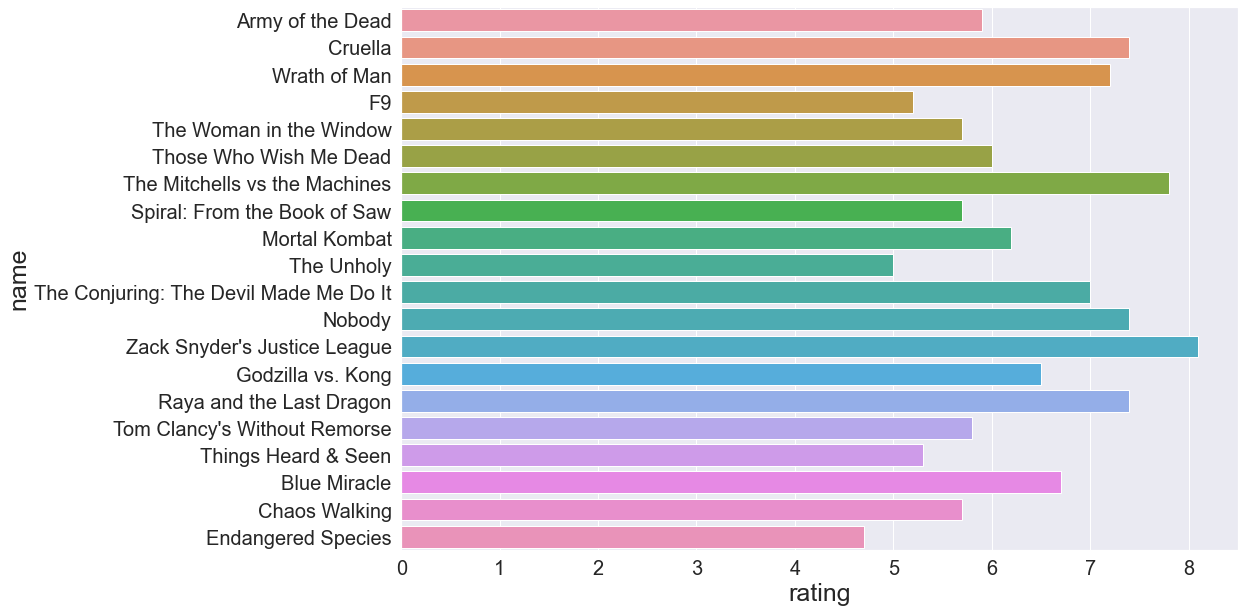

In [15]:
sns.set(rc={'figure.figsize':(15,10),'ytick.labelsize':20,'xtick.labelsize':20,'axes.labelsize':25})
t=sns.barplot(data=data,x='rating',y='name')

<p>It shows that Zack Snyder's Justice League has the highest rating. Well, We all know why,It's a better version of the same movie from 2017 which was directed first by Zack Snyder and then later by another directer which led to a disaster in 2017.</p>
<p>Army of the Dead also has comparitively lower rating.(I liked that one.)</p>
<h4>Okay, Now let's see about 2020.(It's not a good year for anything,due to Covid)</h4> 

In [85]:
data=get_data(2020,5000)
data

,id,name,runtime(in mins),genre,certification,rating,no.of reviews
0,tt8332922,A Quiet Place Part II,97,"[Drama, Horror, Sci-Fi]",PG-13,8.0,12882
1,tt6723592,Tenet,150,"[Action, Sci-Fi, Thriller]",UA,7.4,361439
2,tt9770150,Nomadland,107,[Drama],UA,7.4,99010
3,tt7126948,Wonder Woman 1984,151,"[Action, Adventure, Fantasy]",UA,5.4,207112
4,tt9620292,Promising Young Woman,113,"[Crime, Drama, Thriller]",R,7.5,100806
...,...,...,...,...,...,...,...
245,tt1552211,The Last Days of American Crime,148,"[Action, Crime, Drama]",18,3.7,10081
246,tt5715066,Mortal,104,"[Action, Adventure, Drama]",R,5.9,6794
247,tt9806370,The Owners,92,"[Comedy, Crime, Horror]",R,4.9,5525
248,tt11656172,Hard Kill,98,"[Action, Thriller]",R,3.3,7262


<p>Well that's a quiet noticible list.We got Quiet place 2 and Tenet and Wonder Woman.<br>Tenet has a rating of 7.4.I have never seen any Christopher Nolan movie with rating less than 8.But this one has,Maybe due to releases fixed to fewer locations ,So that reviews has not covered large sample of population.</p>
<p>Let's see which one has highest rating.</p>

In [90]:
data[data['rating']==data['rating'].max()]

,id,name,runtime(in mins),genre,certification,rating,no.of reviews
25,tt8503618,Hamilton,160,"[Biography, Drama, History]",12+,8.5,65138


<p>Hamilton tops it with a rating of 8.5. It's Biography.</p>
<h4>Let's dig a bit deeper to see which genere of movies are maximum.</h4>

In [17]:
genre_df=pd.DataFrame(columns=['name','genre','rating'])
for i in range(data.shape[0]):
    for j in data.iloc[i]['genre']:
        genre_df=genre_df.append({'name':data.iloc[i]['name'],'genre':j,'rating':data.iloc[i]['rating'],'score':data.iloc[i]['rating']/data.iloc[i]['no.of reviews']},ignore_index=True)

<AxesSubplot:xlabel='genre'>

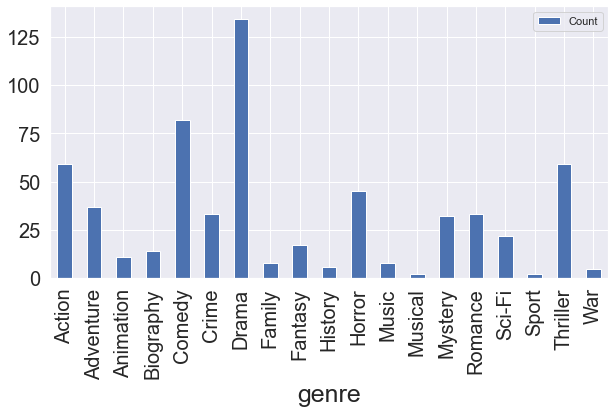

In [18]:
temp=genre_df.groupby('genre').count()
temp1=temp.drop('rating',axis=1)
temp1=temp1.drop('score',axis=1)
temp1.columns=['Count']
plt.rcParams['figure.figsize']=(10,5)
temp1.plot(kind='bar',y='Count')

<p>We can see that there are movies with Drama and then the thrillers and then the Comdey genre.</p>
<h6>Now let's see which genre is successful in 2020(as per rating).<h6>

<AxesSubplot:xlabel='genre'>

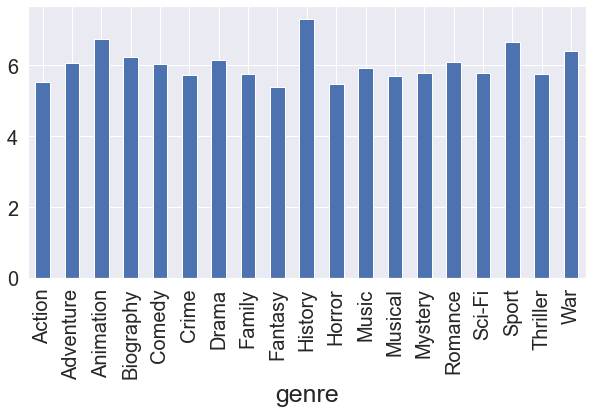

In [19]:
temp=genre_df.groupby('genre')['rating'].mean()
plt.rcParams['figure.figsize']=(10,5)
temp.plot(kind='bar',y='rating')

<p>Great! We can see that almost all genres shared equal taste in success but History genre holds the Lion's share follwed by Animation and Sport.</p> 

In [20]:
genre_df

,name,genre,rating,score
0,A Quiet Place Part II,Drama,8.0,0.000671
1,A Quiet Place Part II,Horror,8.0,0.000671
2,A Quiet Place Part II,Sci-Fi,8.0,0.000671
3,Tenet,Action,7.4,0.000020
4,Tenet,Sci-Fi,7.4,0.000020
...,...,...,...,...
604,Hard Kill,Action,3.3,0.000455
605,Hard Kill,Thriller,3.3,0.000455
606,High Ground,Action,6.5,0.005385
607,High Ground,Adventure,6.5,0.005385


<h4>Let's write a function that returns the top genre for any given Year.</h4>

In [21]:
def get_genre(year):
    data=get_data(year,5000)
    genre_df=pd.DataFrame(columns=['name','genre','rating'])
    for i in range(data.shape[0]):
        for j in data.iloc[i]['genre']:
            genre_df=genre_df.append({'name':data.iloc[i]['name'],'genre':j,'rating':data.iloc[i]['rating'],'score':data.iloc[i]['rating']/data.iloc[i]['no.of reviews']},ignore_index=True)
    temp=genre_df.groupby("genre")['score'].max()
    temp=pd.DataFrame(temp)
    temp.reset_index(inplace=True)
    temp=temp.sort_values(by='score',ascending=False)
    return str(temp.iloc[0]['genre'])

<p>By using the above function,Let's get the Year-wise top genres from 1970 to 2021.</p>

In [22]:
import time
genre_dict=dict()
for i in range(1970,2022):
    print(i,end=" ")
    genre_dict[i]=get_genre(i)
    time.sleep(5)

1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 

In [32]:
genre_df=pd.DataFrame({'Year':list(genre_dict.keys()),'Genres':list(genre_dict.values())})
genre_df.head()
genre_df['Genres'].value_counts()

Drama       13
Thriller    10
Comedy       8
Romance      6
Adult        5
Horror       4
Crime        2
Action       2
Musical      1
Mystery      1
Name: Genres, dtype: int64

In [35]:
data=get_data(2021,20)
data.head()

,id,name,runtime(in mins),genre,certification,rating,no.of reviews
0,tt0993840,Army of the Dead,148,"[Action, Crime, Horror]",18,5.9,98067
1,tt3228774,Cruella,134,"[Comedy, Crime]",PG-13,7.4,26012
2,tt11083552,Wrath of Man,119,"[Action, Thriller]",R,7.2,34063
3,tt5433138,F9,145,"[Action, Adventure, Crime]",PG-13,5.2,5474
4,tt6111574,The Woman in the Window,100,"[Crime, Drama, Mystery]",18,5.7,42286


<h3>Great! We have made this far using the first method for Web Scraping .Now Let's do this using API.</h3>
<p>(API stands for Application Programming Interface. An API is a software intermediary that allows two applications to talk to each other. In other words, an API is the messenger that delivers your request to the provider that you're requesting it from and then delivers the response back to you.)</p>
<p>Let's write a function that takes a list movie ids as parameter and returns a dataframe with the details of all the movies.<br>
    Remember,We have got the ids of movies from the first method .We can use them or we can get the ids by searching on google.<br>
    However,It's good to get the ids from the first method.</p>

In [65]:
def get_api_data(ids):
    df=pd.DataFrame(columns=['Name','ContentType','Genre','Director','Rating','No.of reviews','Score'])
    for i in ids:
        url="http://www.imdb.com/title/{}".format(i)
        time.sleep(5)
        res=requests.get(url)
        data=BeautifulSoup(res.text,'html')
        f=str(data.find("script",attrs={'type':"application/ld+json"}))
        f=f[f.index('{'):-9]
        f=json.loads(f)
        df=df.append({'Name':f['name'],'ContentType':f['contentRating'],'Genre':f['genre'],'Director':f['director'][0]['name'],'Rating':f['aggregateRating']['ratingValue'],'No.of reviews':f['aggregateRating']['ratingCount'],'Score':f['aggregateRating']['ratingValue']/f['aggregateRating']['ratingCount']},ignore_index=True)
    return df

In [66]:
data=get_data(2021,30)
df=get_api_data(list(data['id']))

,Name,ContentType,Genre,Director,Rating,No.of reviews,Score
0,Army of the Dead,18,"[Action, Crime, Horror]",Zack Snyder,5.9,98067,0.000060
1,Cruella,PG-13,"[Comedy, Crime]",Craig Gillespie,7.4,26012,0.000284
2,Wrath of Man,R,"[Action, Thriller]",Guy Ritchie,7.2,34063,0.000211
3,F9,PG-13,"[Action, Adventure, Crime]",Justin Lin,5.2,5474,0.000950
4,The Woman in the Window,18,"[Crime, Drama, Mystery]",Joe Wright,5.7,42286,0.000135
5,Those Who Wish Me Dead,R,"[Action, Drama, Thriller]",Taylor Sheridan,6.0,24836,0.000242
6,The Mitchells vs the Machines,13,"[Animation, Adventure, Comedy]",Michael Rianda,7.8,51470,0.000152
7,Spiral: From the Book of Saw,R,"[Crime, Horror, Mystery]",Darren Lynn Bousman,5.7,8724,0.000653
8,Mortal Kombat,A,"[Action, Adventure, Fantasy]",Simon McQuoid,6.2,107014,0.000058
9,The Unholy,PG-13,"[Drama, Horror, Mystery]",Evan Spiliotopoulos,5.0,6127,0.000816


In [67]:
df.head()

,Name,ContentType,Genre,Director,Rating,No.of reviews,Score
0,Army of the Dead,18,"[Action, Crime, Horror]",Zack Snyder,5.9,98067,0.000060
1,Cruella,PG-13,"[Comedy, Crime]",Craig Gillespie,7.4,26012,0.000284
2,Wrath of Man,R,"[Action, Thriller]",Guy Ritchie,7.2,34063,0.000211
3,F9,PG-13,"[Action, Adventure, Crime]",Justin Lin,5.2,5474,0.000950
4,The Woman in the Window,18,"[Crime, Drama, Mystery]",Joe Wright,5.7,42286,0.000135


<p>We have passed the list of ids to the get_api_data function and got the exact results from the API too.</p>
<p>It's convinient to do this using the Second method because the results are in json format and we can use json library to get the required detatils.</p>
<h5>Okay, Now Let's get back to the dataframe that has top genres from 1970 to 2021.</h5>

In [95]:
genre_df.head()

,Year,Genres
0,1970,Drama
1,1971,Adult
2,1972,Drama
3,1973,Comedy
4,1974,Adult


<h4>We can get the best genre over the past 50 years either by sorting the dataframe or through Visualization.</h4>
<p>Let's do both..</p>

In [75]:
genre_df.groupby("Genres").count().sort_values(by='Year',ascending=False)

,Year
Genres,
Drama,13
Thriller,10
Comedy,8
Romance,6
Adult,5
Horror,4
Action,2
Crime,2
Musical,1


In [80]:
final_viz=genre_df.groupby("Genres").count()
final_viz.columns=['Count']

<AxesSubplot:xlabel='Genres', ylabel='Count'>

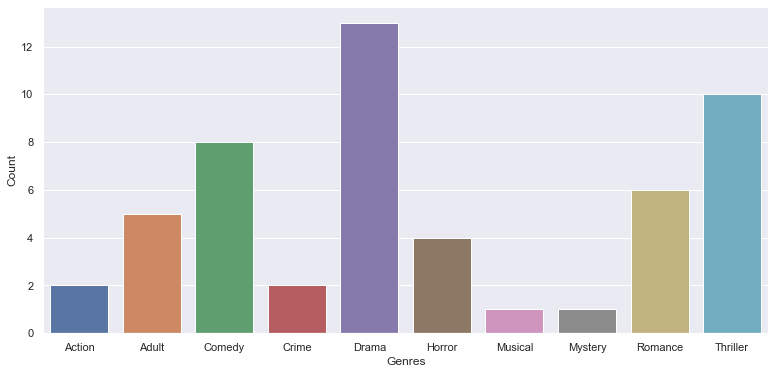

In [83]:
sns.set(rc={'figure.figsize':(13,6)})
sns.barplot(data=final_viz,x=final_viz.index,y='Count')

<h4>Great! We can see that <b>Drama</b> and <b>Thriller</b> are the best genres in the past 50 Years.</h4>
<p>It supports the quote <b>"Everybody likes some drama in chaos"</b></p>.
<h5>But let's see something interesting....</h5>

In [99]:
genre_df.tail(11)

,Year,Genres
41,2011,Comedy
42,2012,Drama
43,2013,Romance
44,2014,Horror
45,2015,Musical
46,2016,Romance
47,2017,Thriller
48,2018,Mystery
49,2019,Horror
50,2020,Thriller


<p>Since 2013, Drama has never been recorded has top genre.I think thats because of change in Cultural practices and Technology.<br>But let's not jump into the conclusions about the reasons before having the data.
<h5>As Sherlock Holmes quotes,<br>“It is a capital mistake to theorize before one has data.”</h5></p>

<p>Okay,that's how We can perform Web Scraping using python libraries and get to play with the data.</p>
<h1>Reported by ANANTHA SAI AVADHANAM</h1>